In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Hồi quy tuyến tính

$$ \Large \widehat{y} = h_{\theta} (x) = \theta \cdot x $$

* $ \theta $: Vector  tham  số  của mô hình: $[\theta_0,\theta_1,...\theta_x] $ 
* x: Vector  đặc  trưng  của  mẫu : chứa $x_0$ đến $x_n,x_0 = 1$ 
* $ \theta \cdot x:$ Tích vô hướng : $\theta_0 \cdot x_0 +\theta_1 \cdot x_1 + ... + \theta_n \cdot x_n$ 

`Mục tiêu`: cực tiểu hóa Mean Squared Error

$$ MSE(X,h_{\theta}) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T x^{i} - y^{i})^2} $$

## Phương trình pháp tuyến

Tìm $ \widehat{\theta} $ để cực tiểu hóa hàm mất mát

$$ \widehat{\theta} = (X^T X)^{-1}X^Ty $$
* $ \widehat{\theta}$ là giá trị của $\theta$ làm cho hàm mất mát đạt cực tiểu
* y là vector chứa các nhãn từ $y^{1}$ đến $y^{n}$


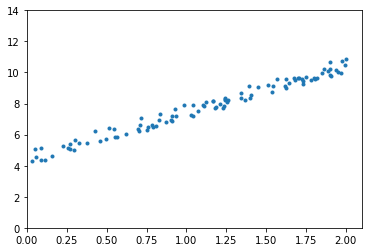

In [49]:
x = 2*np.random.rand(100,1)
y = 3*x + 4 + np.random.rand(100,1)
plt.xlim(0,2.1)
plt.ylim(0,14)
plt.plot(x,y,'.')

In [50]:
x_0 = np.ones((100,1))
X = np.c_[x_0,x] # add x_0 ứng với theta0

In [51]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

hàm số chúng ta dùng để tạo dữ liệu là: y = 3x+4+gauss

In [52]:
theta

array([[4.41073751],
       [3.00459043]])

kết quả mong muốn là $ \theta_0 = 4 $ và $\theta_1 = 3$ => gần đúng( Nhiễu gauss khiến cho việc tìm các tham số của hàm gốc trở nên bất khả thi)

In [53]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b # tai x = 0 va x = 2

array([[1., 0.],
       [1., 2.]])

In [54]:
y_pred = X_new_b.dot(theta) # tich vo huong(nhan vector)
y_pred

array([[ 4.41073751],
       [10.41991837]])

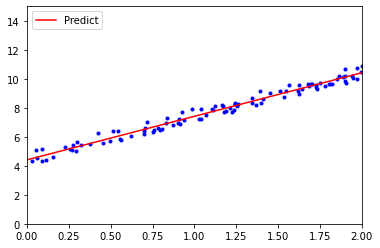

In [55]:
plt.plot(x,y,'b.')
plt.plot(X_new,y_pred,'r-',label = 'Predict')
plt.axis([0,2,0,15])
plt.legend(loc = 'upper left')

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

hệ số điều chỉnh ($\theta_0$) và các $\theta_n$

In [57]:
lin_reg.intercept_,lin_reg.coef_

(array([4.41073751]), array([[3.00459043]]))

In [58]:
lin_reg.predict(X_new)

array([[ 4.41073751],
       [10.41991837]])

Lớp Linear Regression được dựa trên hàm `np.linalg.lstsq` ( 'least squared')

In [59]:
theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)

C:\Users\quypr\AppData\Local\Temp/ipykernel_17448/3920820320.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)


In [60]:
theta_best_svd

array([[4.41073751],
       [3.00459043]])

Hàm này tính $\widehat{\theta} = X^{+}y$
* Trong đó  $X^{+}$ là ma trận giả nghịch đảo của X

In [61]:
np.linalg.pinv(X).dot(y)

array([[4.41073751],
       [3.00459043]])

# Hạ Gradient

## Hạ Gradient theo Batch

Đạo hàm riêng hàm chi phí
$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}{(\theta^T x^{i}-y^{i})x_{j}^{i}}$$

Vector gradient của hàm chi phí
$$\triangledown_{\theta}MSE(\theta) = \left(\begin{array}{cc} \frac{\partial}{\partial\theta_0} MSE(\theta) \\ \frac{\partial}{\partial\theta_1} MSE(\theta) \\ ... \\ \frac{\partial}{\partial\theta_n} MSE(\theta) \end{array} \right) = \frac{2}{m}X^T(X\theta-y)$$

Kích thước mỗi bước cập nhật: $\triangledown_{\theta} $ tỉ lệ thuận $ \triangle$, mục tiêu: giảm $\triangledown_{\theta}$ đến 0 (đạo hàm)
$$\theta^{(bước \ tiếp \ theo)} = \theta - \eta\triangledown_{\theta}MSE(\theta)$$

In [62]:
theta_bgd = []
def plot_gradient(theta,n_iterations=1000,eta = 0.1,theta_bgd = None):
    m = X.shape[0]
    plt.plot(x,y,'b.')
    for i in range(n_iterations):
        if i < 10:
            y_predict = np.dot(X_new_b,theta) # head,tail
            style  = 'b-' if i > 0 else 'r--' 
            plt.plot(X_new,y_predict,style)
        gradient = (2/m)*np.dot(X.T,(np.dot(X,theta)-y))
        theta = theta - eta*gradient
        if theta_bgd is not None:
            theta_bgd.append(theta)
    plt.axis((0,2,0,15))
    plt.xlabel('$X$',fontsize = 15)
    plt.ylabel('$Y$',fontsize = 15,rotation='horizontal')
    plt.title('eta = {}'.format(eta))
    

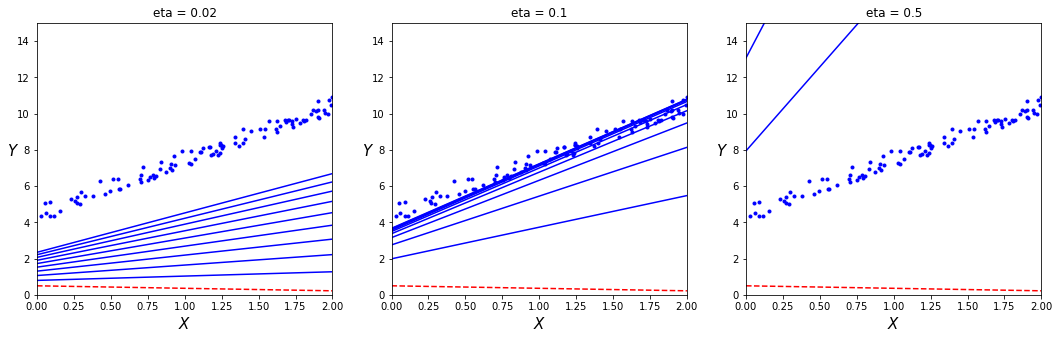

In [63]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(18,5))
plt.subplot(131);plot_gradient(theta,eta = 0.02)
plt.subplot(132);plot_gradient(theta,eta = 0.1,theta_bgd = theta_bgd)
plt.subplot(133);plot_gradient(theta,eta = 0.5)


## Hạ Gradient ngẫu nhiên

In [64]:
epochs = 50
m = X.shape[0]

t0,t1 = 5,50 # learning schedule para
def learning_schedule(t):
    return t0/(t+t1)

Text(0, 0.5, '$Y$')

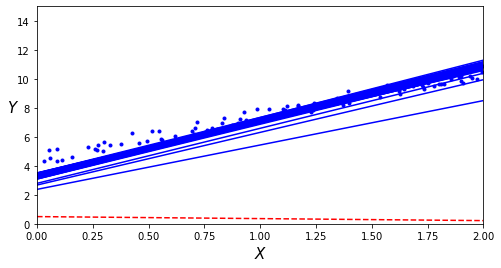

In [65]:
plt.figure(figsize = (8,4))
plt.plot(x,y,'b.')
plt.axis((0,2,0,15))
np.random.seed(42)
theta = np.random.randn(2,1)
theta_rad = []
for epoch in range(epochs):
    for i in range(m):
        if epoch == 0 and i < 30:
            y_pred = np.dot(X_new_b,theta)
            styles = 'b-' if i >0 else 'r--'
            plt.plot(X_new,y_pred,styles)
        rand = np.random.randint(m)
        eta = learning_schedule(epoch*m+i) 
        xi = X[rand:rand+1]
        yi = y[rand:rand+1]
        gradient = (2) * np.dot(xi.T,np.dot(xi,theta)-yi)
        theta = theta - eta*gradient
        theta_rad.append(theta)
plt.xlabel("$X$",fontsize = 15)
plt.ylabel("$Y$",rotation = 0,fontsize = 15)

## Hạ Gradient theo Mini-Batch


array([[4.41489968],
       [3.00718483]])

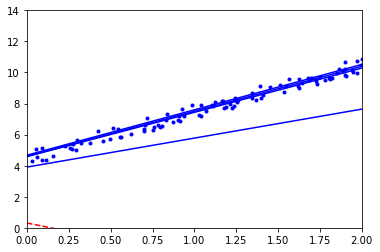

In [66]:
theta = np.random.randn(2,1)
theta_mini = []
plt.plot(x,y,'b.')
plt.axis([0,2,0,14])
epochs = 50
np.random.seed(42)

m = X.shape[0]
mini_patch_size = 20
t0,t1 = 200,1000
t=0

for epoch in range(epochs):
    shuffle = np.random.permutation(m)
    X_shuffle = X[shuffle]
    Y_shuffle = y[shuffle]
    for i in range(0,m,mini_patch_size):
        if epoch ==0 :
            style = 'r--' if i==0 and epoch ==0 else 'b-'
            plt.plot(X_new,np.dot(X_new_b,theta),style)
        t += 1
        xi = X_shuffle[i:i+mini_patch_size]
        yi = Y_shuffle[i:i+mini_patch_size]
        eta = learning_schedule(t)
        gradient = 2/mini_patch_size*np.dot(xi.T,(np.dot(xi,theta)-yi))
        theta = theta - eta*gradient
        theta_mini.append(theta)
theta

In [67]:
theta_bgd = np.array(theta_bgd)
theta_mini = np.array(theta_mini)
theta_rad = np.array(theta_rad)

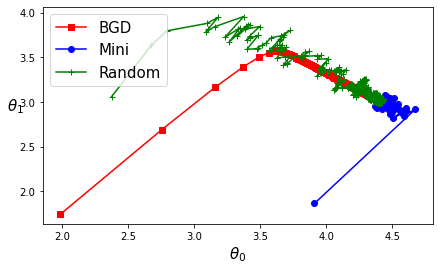

In [68]:
plt.figure(figsize = (7,4))
plt.plot(theta_bgd[:,0],theta_bgd[:,1],'r-s',label = 'BGD')
plt.plot(theta_mini[:,0],theta_mini[:,1],'b-o',label = 'Mini')
plt.plot(theta_rad[:,0],theta_rad[:,1],'g-+',label = 'Random')
plt.xlabel("$\\theta_0$",fontsize = 15)
plt.ylabel("$\\theta_1$",fontsize = 15,rotation = 0)
plt.legend(loc = 'upper left',fontsize = 15)

## Hồi quy đa thức

* Thêm các bậc lũy thừa vào mỗi đặc trưng, coi chúng như là đặc trưng mới, sau đó train trên đặc trưng này
* Có khả năng tìm ra mối quan hệ giữa các đặc trưng do `Poly` thêm vào tất cả tổ hợp của các đặc trưng (tổng bậc số hạng <= bậc cho trước)
    * Ví dụ: với a,b và `Poly` có degree = 3 không chỉ thêm $a^2,a^3,b^2,b^3$ mà còn thêm $ab,a^{2}b,ab^2$
* Degree = d sẽ biến đổi mảng $\textit{n}$ đặc trưng thành 1 mảng $\frac{(n+d)!}{d!n!} $

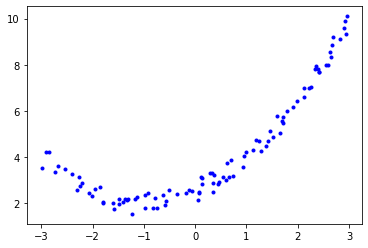

In [69]:
x = 6*np.random.rand(100,1) - 3
y = (1/2)*(x**2) + (1)*x +  np.random.rand(100,1) + 2
plt.plot(x,y,'b.')

In [70]:
from sklearn.preprocessing import PolynomialFeatures
polyfea = PolynomialFeatures(degree = 2,include_bias=False) 
x_new = polyfea.fit_transform(x)
x_new[0]

array([2.38942838, 5.709368  ])

In [71]:
lin_reg.fit(x_new,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.5278938]), array([[0.9804785 , 0.49468385]]))

=> c,b,a

In [72]:
x_new_plot = np.linspace(-6,6,100).reshape(100,1)
x_new_pred = polyfea.transform(x_new_plot)

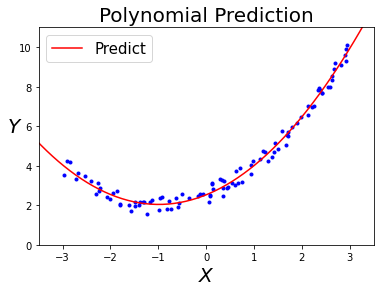

In [73]:
plt.axis([-3.5,3.5,0,11])
plt.title("Polynomial Prediction",fontsize = 20)
plt.xlabel("$X$",fontsize = 20)
plt.ylabel("$Y$",fontsize = 20,rotation = 0)
plt.plot(x,y,'b.')
plt.plot(x_new_plot,lin_reg.predict(x_new_pred),'r-',label = "Predict")
plt.legend(loc = "upper left",fontsize = 15)

## Đồ thị quá trình học

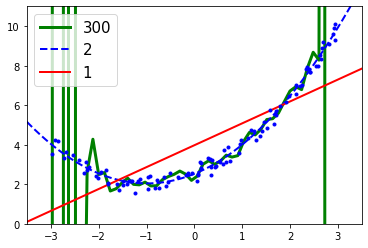

In [74]:
for style,degree,linewidth in (('g-',300,3),('b--',2,2),('r-',1,2)):
    pipeline_poly = Pipeline([
        ("poly_feature",PolynomialFeatures(degree = degree,include_bias=False)),
        ('scaler',StandardScaler()),
        ("linear",LinearRegression())
        ])
    pipeline_poly.fit(x,y)
    y_pred = pipeline_poly.predict(x_new_plot)
    plt.plot(x_new_plot,y_pred,style,linewidth=linewidth,label = degree)
    plt.legend(loc = 'upper left',fontsize = 15)
plt.axis([-3.5,3.5,0,11])
plt.plot(x,y,'b.')

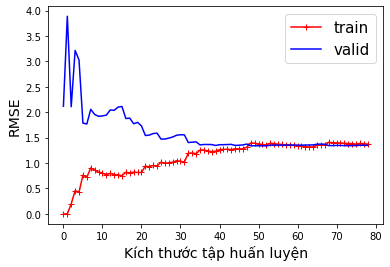

In [75]:
def plot_learning_curves(model,x,y):
    train_error,valid_error = [],[]
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state = 20)
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        train_error.append(mean_squared_error(y_train[:i],model.predict(x_train[:i])))
        valid_error.append(mean_squared_error(y_valid,model.predict(x_valid)))
    plt.plot(np.sqrt(train_error),'r-+',label = 'train')
    plt.plot(np.sqrt(valid_error),'b-',label = 'valid')
    plt.legend(loc = 'upper right',fontsize = 15)
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE",fontsize = 14)
plot_learning_curves(lin_reg,x,y)


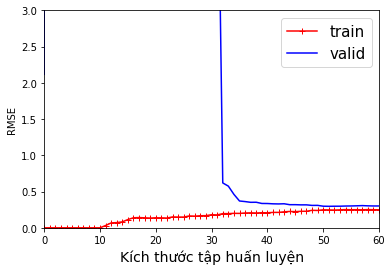

In [76]:
poly_regress = Pipeline([
    ("poly",PolynomialFeatures(degree = 10,include_bias= False)),
    ("lin_reg",LinearRegression())
])
plt.axis([0,60,0,3])
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE")
plot_learning_curves(poly_regress,x,y)

### Đánh đổi Độ chệch/Phương sai
* Độ chệch (Bias): Phần này của sai số khái quát hóa bắt nguồn từ việc đặt sai giả thuyết, chẳng hạn như cho rằng dữ liệu là tuyến tính trong khi nó thực chất là bậc 2. Một mô hình có độ chệch cao rất có thể dưới khớp dữ liệu huấn luyện.
* Phương sai (Variance): Phần này đến từ việc mô hình cực kì nhạy với những thay đổi trong dữ liệu huấn luyện. Một mô hình với bậc tự do cao (Một đa thức bậc cao) sẽ có khả năng biến đổi linh hoạt và vì thế trở nên quá khớp với dữ liệu huấn luyện. 
* Sai số bất khả giảm (Irreducible Error): Phần này đến từ chính sự nhiễu loạn trong dữ liệu. Cách duy nhất để giảm sai số loại này đó là làm sạch dữ liệu.


`=> Tăng độ phức tạp của mô hình thường sẽ tăng phương sai và giảm độ chệch của nó. Ngược lại giảm độ phức tạp của mô hình sẽ tăng độ chệch và giảm phương sai.  `

# Mô hình tuyến tính điều chuẩn

## Hồi quy Ridge (Điều chuẩn Tikhonov)

* Là một phiên bản được điều chuẩn của `hồi quy tuyến tính`.
* Tham số điều chuẩn (regularization term) : $\alpha\sum_{i=1}^{n}{\theta_{i}^2}$ được thêm vào hàm chi phí.
* Tham số điều chuẩn chỉ nên được thêm vào hàm chi phí cho quá trình huấn luyện. Sau khi huấn luyện, chất lượng mô hình nên được đánh giá với hàm chi phí không dùng điều chuẩn.
* Việc co giãn dữ liệu (StandardScaler) trước khi thực hiện hồi quy Ridge rất quan trọng, bởi vì mô hình này nhạy cảm với tỉ lệ của các đặc trưng đầu vào. Hầu hết các mô hình được điều chuẩn đều như vậy.

$$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}{\theta_{i}^2} $$

In [77]:
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

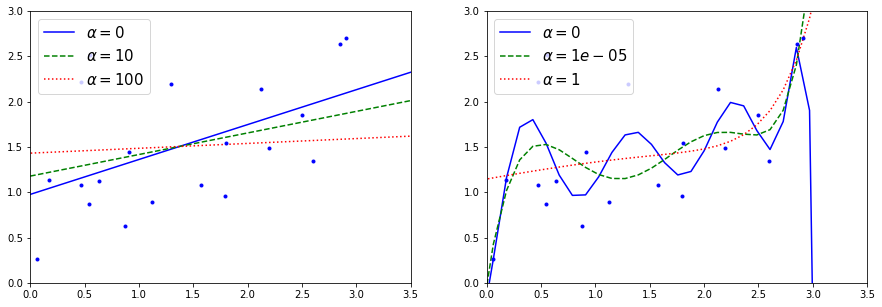

In [78]:
def plot_model(model_class,polynomial,x,y,alphas,**model_arg):
    for alpha,style in zip(alphas,("b-","g--",'r:')):
        model = model_class(alpha,**model_arg)
        if polynomial:
            model = Pipeline([
                ("poly_fea",PolynomialFeatures(degree = 10,include_bias = False)),
                ("std_scale",StandardScaler()),
                ("model",model)
            ]) 
        x_new_plot = np.linspace(-6,6,100).reshape(100,1)
        model.fit(x,y)
        plt.plot(x_new_plot,model.predict(x_new_plot),style,label = r"$\alpha = {}$".format(alpha))
        plt.legend(loc = 'upper left',fontsize = 15)
    plt.plot(x,y,'b.')
    plt.axis([0,3.5,0,3])

plt.figure(figsize = (15,5))
plt.subplot(121)    
plot_model(Ridge,False,x,y,(0,10,100),random_state = 20)
plt.subplot(122)
plot_model(Ridge,True,x,y,(0,10**-5,1),random_state = 20)


### Phương trình dạng đóng
$$\widehat{\theta} = (X^{T}X+\alpha A)^{-1}X^{T}y$$

Trong đó: A là ma trận đơn vị với kích thước (n+1)x(n+1), nhưng có phần tử ở góc trên bên trái bằng 0 tương ứng với hệ số điều chỉnh

In [79]:
ridge_reg = Ridge(alpha=1,solver = 'cholesky',random_state=42) # sử dụng kĩ thuật phân rã ma trận của Cholesky
ridge_reg.fit(x,y)
ridge_reg.predict([[1]])


array([[1.3693128]])

**Lưu ý**: để thống nhất với phiên bản trong tương lai, chúng ta đặt `max_iter=1000` và `tol=1e-3` bởi chúng là các giá trị mặc định trong Scikit-Learn 0.21

In [80]:
sgd_reg = SGDRegressor(penalty = 'l2',max_iter=1000,tol=10**-3,random_state=42) #penalty quyết định loại điều chuẩn được dùng (l2)
sgd_reg.fit(x,y)
sgd_reg.predict([[1]])

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.15990883])

## Hồi quy Lasso
* Hồi quy toán tử lựa chọn và co tuyệt đối nhỏ nhất (Least Absolute Shrinkage and Selection Operator Regression).
* Hồi quy Lasso có khuynh hướng loại bỏ trọng số của những đặc trưng ít quan trọng (đưa về 0).


$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_{i}|$$

C:\Users\quypr\AppData\Local\Temp/ipykernel_17448/2190635242.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x,y)
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\linear_model\_c

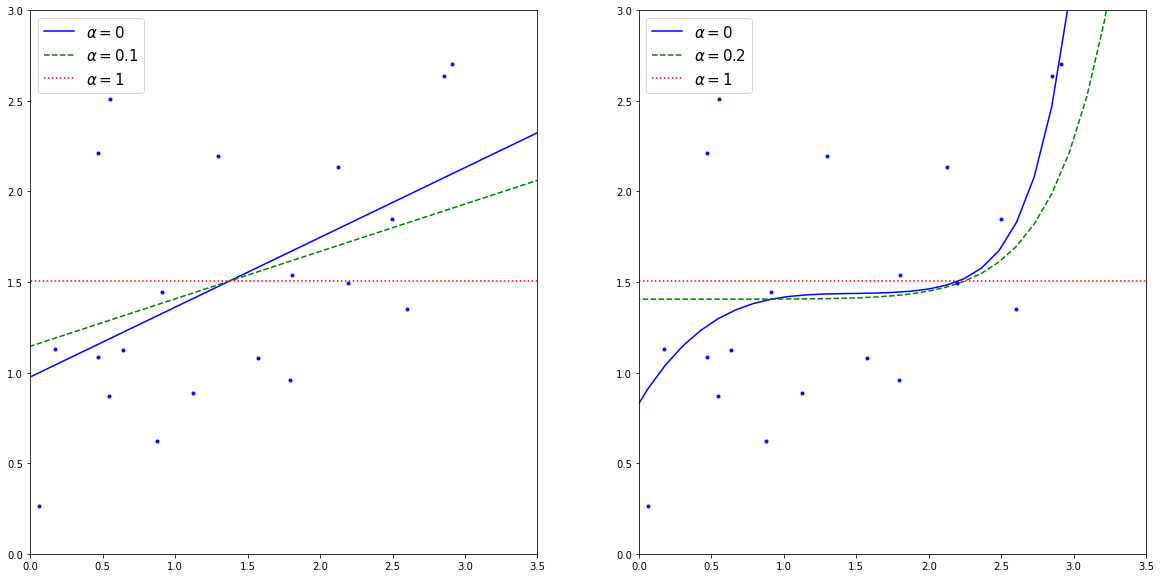

In [81]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plot_model(Lasso,False,x,y,(0,0.1,1),random_state = 20)
plt.subplot(122)
plot_model(Lasso,True,x,y,(0,0.2,1),random_state = 20)


In [82]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(x,y)
lasso_reg.predict([[1]])

array([1.36556062])

## Elastic Net
* Dung hòa hồi quy Ridge và hồi quy Lasso bằng cách kết hợp hệ số điều chuẩn với tỉ lệ `r`


$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_{i}| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_{i}^2$$

In [83]:
elastic_reg = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_reg.fit(x,y)
elastic_reg.predict([[-2]])

array([0.47714065])

## Tóm tắt
* Gần như trong mọi trường hợp thì nên sử dụng điều chuẩn và tránh chỉ sử dụng hồi quy Tuyến tính đơn thuần.
* Ridge là một mặc định hiệu quả nhưng nếu vẫn nghi ngờ rằng chỉ có 1 vài đặc trưng hữu ích, ta nên dùng Lasso hay Elastic vì chúng có khuynh hướng giảm trọng số của các đặc trưng không có ích về 0.
* Thông thường Elastic được ưa chuộng hơn Lasso vì Lasso có thể hoạt động bất thường khi lượng đặc trưng lớn hơn lượng mẫu huấn luyện hoặc khi một vài đặc trưng tương quan chặt chẽ với nhau.

## Phương pháp dừng sớm


In [84]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(x[:50], y[:50], test_size=0.5, random_state=10)

In [85]:
poly_pipeline = Pipeline([
    ("poly",PolynomialFeatures(degree = 90,include_bias=False)),
    ("std_scaler",StandardScaler())
])
X_train_poly = poly_pipeline.fit_transform(X_train)
X_val_poly = poly_pipeline.transform(X_val)

In [86]:
sgd_reg = SGDRegressor(max_iter=1,tol = -np.infty,warm_start = True, penalty= None, 
                        learning_rate= 'constant', eta0 = 0.0005,random_state = 42) # warm_start: khi gọi fit thì việc huấn luyện sẽ tiếp diễn ngay tại tđiểm dừng huấn luyện trước đó thay vì bắt đầu lại từ đầu
epochs = 500
train_error = []
val_error = []
for epoch in range(epochs):
    sgd_reg.fit(X_train_poly,y_train)
    y_train_pred = sgd_reg.predict(X_train_poly)
    y_val_pred = sgd_reg.predict(X_val_poly)
    train_error.append(mean_squared_error(y_train,y_train_pred))
    val_error.append(mean_squared_error(y_val,y_val_pred))

best_epoch = np.argmin(val_error)
best_val_rmse = np.sqrt(val_error[best_epoch])

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

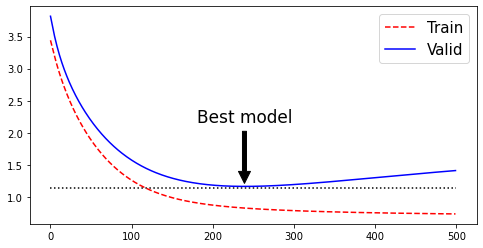

In [87]:
plt.figure(figsize = (8,4))
plt.annotate(
    "Best model",
    xy = (best_epoch,best_val_rmse),
    xytext = (best_epoch,best_val_rmse+1),
    arrowprops = dict(facecolor = 'black',shrink = 0.05),
    ha = 'center',
    fontsize = 17
)
plt.plot([0,epochs],[best_val_rmse-0.03,best_val_rmse-0.03],'k:')
plt.plot(np.sqrt(train_error),'r--',label = 'Train')
plt.plot(np.sqrt(val_error),'b-',label = 'Valid')
plt.legend(loc = 'upper right',fontsize = 15)

# Hồi quy Logistic  

# Ước lượng xác xuất

$$\hat{p} = h_{\theta}(x) = \sigma(x^T\theta)$$


* $\sigma$: là một hàm `Sigmoid` (có đồ thị dạng chữ S) cho đầu ra từ 0 đến 1: $\sigma(t) = \frac{1}{1+e^-t}$

In [88]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

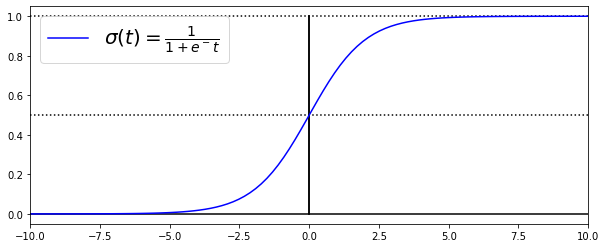

In [89]:
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.figure(figsize = (10,4))
plt.xlim((-10,10))
plt.plot([-10,10],[0.5,0.5],'k:')
plt.plot([-10,10],[1,1],'k:')
plt.plot([0,0],[0,1],'k-')
plt.plot([0,0],[0,1],'k-')
plt.plot([-10,10],[0,0],'k-')
plt.plot(x,y,'b-',label = "$ \sigma(t)= \\frac{1}{1+e^-t} $")
plt.legend(loc = 'upper left',fontsize = 20)


Do đó 
$$y = \left\{\begin{array}{cc} 0: \hat{p} < 0.5 \\ 1: \hat{p} \geq 0.5 \end{array} \right.$$

## Hàm chi phí


$$ c(\theta) =\left\{ \begin{array}{cc} -log(\hat{p}): y=1 \\ -log(1-\hat{p}):y=0 \end{array}\right. $$


* Ta thấy hàm chi phí này là hợp lí vì -log(p) sẽ rất lớn nếu p tiệm cận 0 nên chi phí sẽ rất lớn nếu mô hình ước lượng xác suất mẫu dương gần với 0. Tương tự, chi phí cũng sẽ rất lớn nếu mô hình ước lượng xác xuất mẫu âm gần với 1. 
* Mặt khác, -log(p) gần với 0 khi p gần với 1 nên chi phí sẽ gần 0 nếu xác xuất ước lượng gần với 1 cho mẫu dương và xác xuất ước lượng gần với 0 cho mẫu âm.

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$

* Không tồn tại phương trình dạng đóng để tính trực tiếp giá trị $\theta$ mà tại đó hàm chi phí đạt giá trị nhỏ nhất (Ptrinh Pháp tuyến).
* Vì hàm chi phí này là hàm lồi, do đó Hạ Gradient chắc chắn sẽ tìm được giá trị nhỏ nhất 

Đạo hàm riêng hàm chi phí 
$$\frac{\delta}{\delta\theta_{j}}J(\theta) = \frac{1}{m}(\sigma(\theta^Tx^{(i)})-y^{(i)})x^{(i)}_j$$

Khi có được `Vector Gradient` chứa tất cả các đạo hàm riêng thì ta có thể dùng `Vector` này trong thuật toán Hạ Gradient theo Batch => Đây là cách huấn luyện mô hình hồi quy Logistic

## Ranh giới quyết định

Sử dụng tập dữ liệu chứa kích thước dài rộng của đài và cánh hoa của 150 bông hoa Iris. Để nhận diện hoa Iris virginica dựa trên độ rộng cánh hoa.

In [90]:
from sklearn.datasets import load_iris
iris = load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [91]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [92]:
x = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)

In [93]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()
logis_reg.fit(x,y)

LogisticRegression()

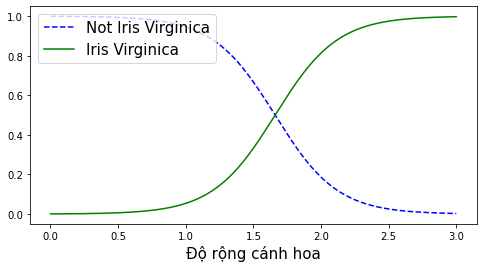

In [94]:
x_new = np.linspace(0,3,1000).reshape(-1,1) # Do rong canh hoa
y_proba = logis_reg.predict_proba(x_new) # not true, true
plt.figure(figsize=(8,4))
plt.plot(x_new,y_proba[:,0],'b--',label = 'Not Iris Virginica')
plt.plot(x_new,y_proba[:,1],'g-',label = 'Iris Virginica')
plt.xlabel("Độ rộng cánh hoa",fontsize = 15)
plt.legend(loc = 'upper left',fontsize = 15)

`Siêu tham số điều khiển mức điều chuẩn cho hồi quy Logistic trong Sklearn không phải là alpha (như trong các mô hình hồi quy khác), mà là giá trị nghịch đảo của nó: C. C có giá trị càng cao thì mô hình càng ít bị điều chuẩn `

## Hồi quy Softmax

* Là mô hình hồi quy Logistic có thể được tổng quát hóa cho bài toán phân loại đa lớp mà không cần phải huấn luyện và kết hợp nhiều bộ phân loại nhị phân.
* Ý tưởng: với một mẫu x, mô hình hồi quy Softmax sẽ tính điểm $s_k(x)$ cho mỗi lớp k, rồi ước lượng xác suất cho mỗi lớp bằng cách áp dụng `hàm Softmax` cho các điểm số đó.


$$s_k(x) = x^T\theta^{k}$$
<center> Phương trình tính điểm số cho lớp k

* Mỗi lớp có một vector tham số $\theta^{k}$ riêng. Các vector này thường được lưu dưới dạng các hàng trong ma trận tham số (Parameter matrix).
* Sau khi tính xong điểm số cho mỗi lớp k cho mẫu x, ta có thể ước lượng xác suất $\hat{p}_k$ mà mẫu này thuộc về lớp k bằng cách đưa các điểm số này qua hàm `Softmax`

$$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{i=1}^{K}exp(s_i(x))}$$

Trong đó:
* K là số lớp
* s(x): vector chứa điểm số của mỗi lớp cho mẫu x
* $\hat{p_k}$: xác xuất ước lượng mà mẫu x thuộc lớp k khi biết điểm số của mỗi lớp

=> Lớp có điểm số cao nhất là:
$\hat{y} = argmax(\sigma(s(x)))_k = argmax(s_k(x))$

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K} y_k^{(i)}log(\hat{p}_k^{(i)})}$$
<center> Hàm chi phí entropy chéo

Trong đó: 
* $\hat{p}_k^{(i)}$ là xác xuất mục tiêu mà mẫu thứ i thuộc về lớp k, thường có giá trị 1 hoặc 0

Vector Gradient theo $\theta^{(k)}$ của hàm chi phí:
$$\triangledown_{\theta^{(k)}}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$$
<center> Vector Gradient của Entropy chéo theo lớp k

In [96]:
X = iris['data'][:,(2,3)]
y= iris['target']

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [100]:
softmax_reg.predict([[5,2]]) #predict canh hoa dai 5 va rong 2

array([2])